# Managing variables
### Preparation

In [1]:
%config IPCompleter.greedy = True
%load_ext autoreload
%autoreload 2

import qiskit_metal as metal
from qiskit_metal import designs, qlibrary, draw
from qiskit_metal import MetalGUI, Dict

In [2]:
design = designs.DesignPlanar()
gui = MetalGUI(design)

In [3]:
from qiskit_metal.qlibrary.qubits.transmon_pocket import TransmonPocket
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander

connection_pads = dict(connection_pads=dict(
                a = dict(loc_W=+1,loc_H=+1), 
                b = dict(loc_W=-1,loc_H=+1),
                c = dict(loc_W=+1,loc_H=-1),
                d = dict(loc_W=-1,loc_H=-1)
            ))
q1 = TransmonPocket(design, 'Q1', options = dict(pos_x='-1.5mm', pos_y='+0.0mm', **connection_pads))
q2 = TransmonPocket(design, 'Q2', options = dict(pos_x='+1.5mm', pos_y='+0.0mm', **connection_pads))
q3 = TransmonPocket(design, 'Q3', options = dict(pos_x='+0.0mm', pos_y='+1.3mm', **connection_pads))



options = Dict(
    pin_inputs=Dict(
        start_pin=Dict(
            component= 'Q1',
            pin= 'a'),
        end_pin=Dict(
            component= 'Q2',
            pin= 'b')),
)
design.variables.cpw_width = '10um'
design.variables.cpw_gap = '6um'
cpw = RouteMeander(design, 'cpw', options)

gui.rebuild()
gui.autoscale()

In [4]:
design.parse_value("['10um', '1nm']")

[0.01, 1.0000000000000002e-06]

In [5]:
metal.config.DefaultMetalOptions.default_generic.units

'mm'

In [6]:
# outdated: gui.ui.tabWidget.setTabPosition(0)

In [7]:
table = gui.variables_window.ui.tableView
table.resizeColumnsToContents()

In [8]:
from PySide2.QtWidgets import QAbstractItemView
table.setVerticalScrollMode(QAbstractItemView.ScrollPerPixel)
table.setHorizontalScrollMode(QAbstractItemView.ScrollPerPixel)

In [9]:
table.adjustSize()

In [10]:
gui.config.clear()

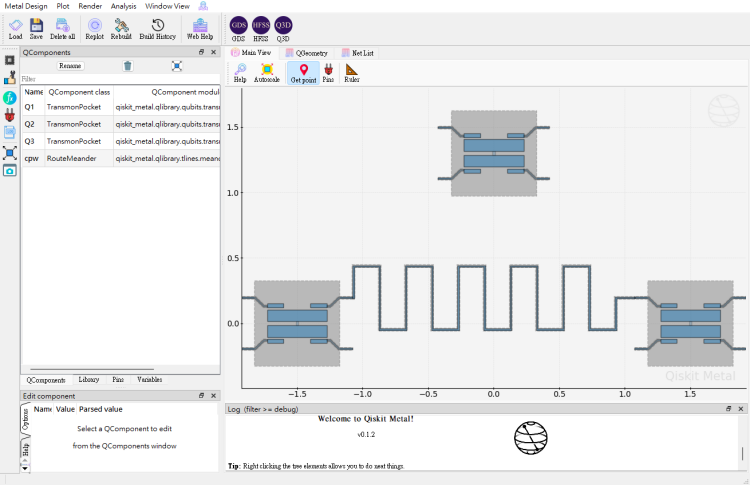

In [11]:
gui.screenshot()

In [12]:
# Set variables in the design
design.variables.pad_width = '400 um'

# Assign variables to component options
q1.options.pad_width = 'pad_width'
q2.options.pad_width = 'pad_width'
q3.options.pad_width = 'pad_width'

# Rebuild all compoinent and refresh the gui 
gui.rebuild()
gui.autoscale()

In [13]:
# Set variables in the design
design.variables.pad_width = '300 um'

# Rebuild all compoinent and refresh the gui 
gui.rebuild()
gui.autoscale()

In [14]:
# Set variables in the design
design.variables.pad_width = '550 um'

# Rebuild all compoinent and refresh the gui 
gui.rebuild()
gui.autoscale()

In [15]:
q1.qgeometry_bounds()

array([-1.925, -0.325, -1.075,  0.325])

In [16]:
# outdated: q1.qgeometry_list()

In [17]:
q1.qgeometry_plot

<bound method QComponent.qgeometry_plot of name:    Q1
class:   TransmonPocket        
options: 
  'pos_x'             : '-1.5mm',                     
  'pos_y'             : '+0.0mm',                     
  'orientation'       : '0.0',                        
  'chip'              : 'main',                       
  'layer'             : '1',                          
  'connection_pads'   : {
       'a'                 : {
            'pad_gap'           : '15um',                       
            'pad_width'         : '125um',                      
            'pad_height'        : '30um',                       
            'pad_cpw_shift'     : '5um',                        
            'pad_cpw_extent'    : '25um',                       
            'cpw_width'         : 'cpw_width',                  
            'cpw_gap'           : 'cpw_gap',                    
            'cpw_extend'        : '100um',                      
            'pocket_extent'     : '5um',           

In [18]:
type(q1.qgeometry_table('poly'))

geopandas.geodataframe.GeoDataFrame

In [19]:
q1.qgeometry_table('poly')

,component,name,geometry,layer,subtract,helper,chip,fillet
0,1,pad_top,"POLYGON ((-1.77500 0.01500, -1.22500 0.01500, ...",1,False,False,main,NaN
1,1,pad_bot,"POLYGON ((-1.77500 -0.10500, -1.22500 -0.10500...",1,False,False,main,NaN
2,1,rect_pk,"POLYGON ((-1.82500 -0.32500, -1.17500 -0.32500...",1,True,False,main,NaN
3,1,a_connector_pad,"POLYGON ((-1.35000 0.12000, -1.22500 0.12000, ...",1,False,False,main,NaN
4,1,b_connector_pad,"POLYGON ((-1.65000 0.12000, -1.77500 0.12000, ...",1,False,False,main,NaN
5,1,c_connector_pad,"POLYGON ((-1.35000 -0.12000, -1.22500 -0.12000...",1,False,False,main,NaN
6,1,d_connector_pad,"POLYGON ((-1.65000 -0.12000, -1.77500 -0.12000...",1,False,False,main,NaN


In [20]:
# outdated: gui.component_window.model.index(1,0)